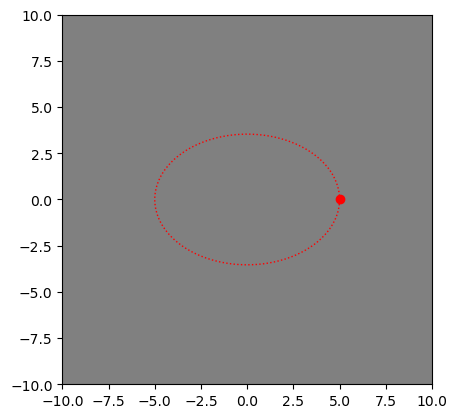

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# User parameters:


angle_of_incidence_deg = 45 # Angle_of_incidence_degngle of incidence in 
                            # degrees, between the projector and the surface
motor_x_amplitude      = 5  # Amplitude of motion of motor x
motor_y_amplitude      = 5  # Amplitude of motion of motor y

# Time array:
t_values = np.linspace(0, 2 * np.pi, 100)

# Motor functions:
def motor_x(t, amp):
    return amp * np.cos(t)

def motor_y(t, amp):
    return amp * np.sin(t)

# Function to get beam projection considering the angle of incidence:
def beam_projection(x, y, angle_of_incidence_deg):
    y_ellipse = y * np.cos(np.deg2rad(angle_of_incidence_deg))
    return x, y_ellipse

# Create figure and axes:
fig, ax = plt.subplots()

# Set up the plot limits:
ax.set_xlim(-r-5, r+5)
ax.set_ylim(-r-5, r+5)

# Set the aspect ratio to be equal so plot is square:
ax.set_aspect('equal')

# Max amplitude calculated so that plot shows entire path:
max_amplitude = np.maximum(
    motor_x_amplitude, 
    motor_y_amplitude
) 

# Plot the reflective surface:
surface = plt.Rectangle(
    (-max_amplitude-5, -max_amplitude-5), 
    2 * max_amplitude + 10, 
    2 * max_amplitude + 10, 
    color='grey'
)
ax.add_patch(surface)

# Plot the initial beam position
x_init, y_init = motor_x(0, motor_x_amplitude), motor_y(0, motor_y_amplitude)
x_proj, y_proj = beam_projection(x_init, y_init, angle_of_incidence_deg)
beam = plt.scatter([x_proj], [y_proj], color='red')

# Path of the beam (for tracing):
path_x, path_y = [], []
beam_path, = plt.plot([], [], 'r:', linewidth=1)

# Update function for the animation:
def update(frame):
    x = motor_x(t_values[frame], motor_y_amplitude)
    y = motor_y(t_values[frame], motor_y_amplitude)
    x_proj, y_proj = beam_projection(x, y, angle_of_incidence_deg)
    beam.set_offsets([x_proj, y_proj])
    
    # Update the path of the beam:
    path_x.append(x_proj)
    path_y.append(y_proj)
    beam_path.set_data(path_x, path_y)

    return beam, beam_path

# Create the animation:
ani = animation.FuncAnimation(fig, update, frames=len(t_values), interval=50, blit=True)

# Display the animation in the notebook:
HTML(ani.to_jshtml())